Program started......
Loading data.........
Done!
Successfully loaded 205 details.


please select one of the following options:
[I] Option to retrieve an individual car details using the car_ID
[II] Option to retrieve all cars for a specified cylinder number
[III] Option to retrieve all cars for a specified car body
[IV] Option to retrieve specific number (2 to 5) columns related to an individual car by the car_ID 

[V] Option to retrieve car names alphabetically
[VI] Option to retrieve summary of sales i.e the total car price for each car body
[VII] Option to retrieve the top 5 car sale by price (the most expensive) and per car body
[VIII] Option to retrieve the details of cars based on your own selection

[IX]option to display/visualize the number of cars per fuel system using a bar chart
[X] Option to display the horsepower of the top 5 car sale by price (the cheapest) using a 
subplot
[XI] Option to display the  the selection of data by your choice to present the customers’ buying

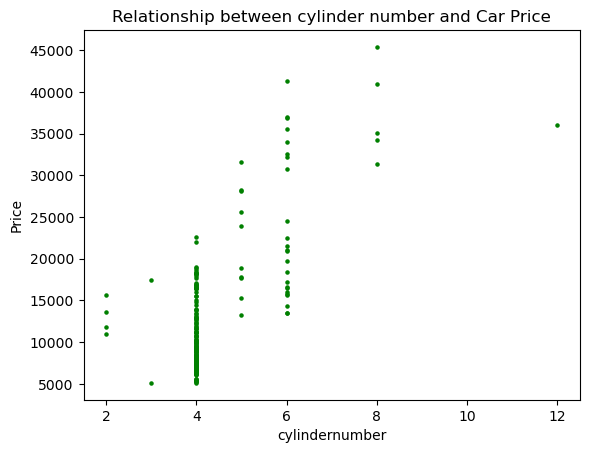

In [9]:
### importing csv
import csv
import random as rand
# specify file-path
file_path = "Car_manufacture/CarPrice.csv"
# create an empty list with variable named "details". This is the list where the csv file will be read into.
details = []
# Display message
print("Program started......")
print("Loading data.........\n", end="")

# program to open file with error exception
try:
  with open(file_path) as csv_file:
    csv_reader = csv.reader(csv_file)
    headings = next(csv_reader)

# using for loop to access each line from the file  
    for line in csv_reader:
      details.append(line)
    
# Display message for loading file   
  print("Done!")   
  print(f"Successfully loaded {len(details)} details.")# Display message

except IOError:
  print("Could not read the file.")

# program to allow user to select any option to get the details of any car.
print("""

please select one of the following options:
[I] Option to retrieve an individual car details using the car_ID
[II] Option to retrieve all cars for a specified cylinder number
[III] Option to retrieve all cars for a specified car body
[IV] Option to retrieve specific number (2 to 5) columns related to an individual car by the car_ID 

[V] Option to retrieve car names alphabetically
[VI] Option to retrieve summary of sales i.e the total car price for each car body
[VII] Option to retrieve the top 5 car sale by price (the most expensive) and per car body
[VIII] Option to retrieve the details of cars based on your own selection

[IX]option to display/visualize the number of cars per fuel system using a bar chart
[X] Option to display the horsepower of the top 5 car sale by price (the cheapest) using a 
subplot
[XI] Option to display the  the selection of data by your choice to present the customers’ buying 
behaviour using a suitable visualisation

""")



selected_option = str(input())
print(f"You have selected option:{selected_option}\n") # Display message

# program to retrieve car details based on the car_ID selected
if   selected_option == "I":
        print("Enter Selected car_ID from 1 to 205: ") # Display message
        car_ID = int(input())
        # specifying the indexes by stating Car_ID position 1 is index 0 which brings about the negative sign.
        car_ID-=1  
        print(f"The individual car details based on the car_ID index {car_ID} are......\n") # Display message
        print(details[car_ID]) # Display message

# program to retrieve car details based on a specified cylinder number
elif  selected_option == "II":
        car_details = []
        print("Enter a cylinder number based on the following numbers....2,3,4,5,6,8,12: ")
        cylindernumber = input()
        print(f"The total car details based on the cylinder number {cylindernumber} are....\n")
        # using list comprehension to retrieve the car details based on cylindernumber entered by the user
        car_details = [x for x in details if x[13] == cylindernumber] 
        # display message
        print(car_details)
 
 # program to retrieve car details based on a specified car body
elif  selected_option == "III":
        car_details_for_a_Specified_car_body = []
        print("Enter a specified car body based on the following..sedan,hatchback,wagon,convertible,hardtop: ")
        car_body = str(input())
        print(f"The total car details based on the specified car body {car_body} are.....\n") # Display message
        # using list comprehension to retrieve the car details based on car body entered by the user
        car_details_for_a_specified_car_body = [y for y in details if y[4] == car_body] 
        # display message
        print(car_details_for_a_specified_car_body) 
    
# program selected to retrieve specific number of colummns related to an individual car by ID.
elif  selected_option == "IV":
        print("Enter Selected car_ID from 1 to 205: ") # Display message
        car_ID = int(input())
        # specifying the indexes by stating Car_ID position 1 is index 0 which brings about the negative sign .
        car_ID-=1 
        print(f"The specific columns(car_ID,fueltype,car_body,engine-location,car-length and car-height) related to an individual car by car_ID index {car_ID} are.......\n")
        car_ID = details[car_ID]
        car_record_based_on_ID = car_ID[0:11:2] # using slicing method to iterate the indexes and step 2 in iteration.
        # Display message
        print(car_record_based_on_ID)

# program selected to retrieve Car Names alphabetically.
elif selected_option == "V":
        import pandas as pd
        file_path = "Car_manufacture/CarPrice.csv" # specifying the file path
        df = pd.read_csv("Car_manufacture/CarPrice.csv",header=0) #load into a data frame
        Car_Names = input("Type 'Car Names' to retrieve the car names alphabetically:\n\n ")
        if Car_Names == 'Car Names':
          # group the data in the data frame(df) using pandas and group by function
            df_grouped = df.groupby(['CarName'])
            df_grouped = df.sort_values('car_ID')
            df_grouped = df_grouped.filter(['CarName','car_ID'])
            # Display message
            print(df_grouped)
    
# program selected to retrieve summary of sales (total car price) for each car body
elif  selected_option == "VI":
        import pandas as pd
        # specifying file path
        df = pd.read_csv("Car_manufacture/CarPrice.csv",header=0) #load into a data frame
        car_sales_summary = input("Type 'total' to access the total sales for each car body:\n\n ")
        if car_sales_summary == 'total':
          # group the data in the data frame(df) using pandas and group by function
            df_grouped = df.groupby(['car_body']).sum()
            df_grouped = df_grouped.filter(['car_body','price'])
            print(df_grouped)

# Program selected to retrieve  the top 5 car sale by price (the most expensive) and per car body   
elif  selected_option == "VII":
        df =  pd.read_csv("Car_manufacture/CarPrice.csv",header=0) #load into a data frame
        highest_top5_car_sale = input("Type 'highest sales' to access the 5 most expensive car for each body type:\n\n ")
        if highest_top5_car_sale  == 'highest sales':
            #use panda sort and filter function to retrieve carbody and price data
            sorted_sales = df.sort_values(by = ["car_body", "price"], inplace =False, ascending=[1,0])
            sorted_sales = sorted_sales.filter(['car_body', 'price'])
            sorted_sales[0:5] # using slicing to get the indexes from 0 to 5 excluding index 5 after being sorted
            sorted_sales = sorted_sales.reset_index(drop = True)
            print(f"Top 5 most expensive cars per body type:\n\n {sorted_sales}")
            
    
# Program selected to retrieve the detail of cars based on user's selection      
elif selected_option == "VIII":
        import numpy as np
        import pandas as pd
        data = np.loadtxt("Car_manufacture/CarPrice.csv",delimiter=",", dtype=str)
        df = pd.read_csv("Car_manufacture/CarPrice.csv",header=0) #load into a data frame
        total_sales = input("Type 'total' to access the total sales for each car name:\n\n ")
        if total_sales == 'total':
            #group data using car name and sum 
            df_grouped = df.groupby(['CarName']).sum()
            df_grouped = df_grouped.filter(['CarName','price'])
            print(df_grouped)
        
# Program selected to display the number of cars per fuel system using a bar chart   
elif  selected_option == "IX":
       # importing important libraries needed for the plotting of the graph 
        import pandas as pd
        import csv
        import matplotlib.pyplot as plt
        # the first way is to get the number of cars per fuel system is to use the groupby function and then count function.
        df = pd.read_csv("Car_manufacture/CarPrice.csv",header=0) #load into a data frame
        df_groupedby_fuel_system = df.groupby(['fuelsystem'])
        # display message
        df_groupedby_fuel_system.count()
    
       # Alternatively,
        df = pd.read_csv("Car_manufacture/CarPrice.csv")
        chart = input("Type 'display chart' to view information on the number of cars per fuel system:\n\n ")
        #using the value_count function to determine the number of cars per fuel system 
        fuel_system_sort  = df["fuelsystem"].value_counts()
        fuel_system = fuel_system_sort.tolist()
        car_no = fuel_system_sort.index.tolist()
        #plotting bar chart 
        fig = plt.figure() 
        plt.bar(car_no, fuel_system)
        plt.xlabel("Fuel System")
        plt.ylabel("No. of Cars")
        plt.title("Number of Cars per Fuel System")
        plt.show() # show the graph
    
    
    
# Program selected to display the horsepower of the top 5 car sale by price (the cheapest) using a subplot
elif  selected_option == "X":
        import pandas as pd
        import csv
        import matplotlib.pyplot as plt
        df = pd.read_csv("Car_manufacture/CarPrice.csv")
        plot = input("Type 'display chart' to view information on the horse power of the 5 cheapest cars :\n\n ")
        
        #sort data by cheapest price 
        df_plot = df.sort_values(by=["price"], ascending=True) [['CarName','horsepower']]
        
        #Create a new dataframe for 5 cheapest cars
        df_plot_5 = df_plot.head()
        
        fig, ax = plt.subplots(figsize=(15, 12))
        plt.suptitle("Horsepower of 5 Cheapest Cars ", fontsize=18, y=0.95)
        
        # retrieve the car name from the sorted dataframe and convert to list
        cars = df_plot_5['CarName'].tolist()
        
        # retrieve the horse power from the sorted dataframe and convert to list
        horsepower = df_plot_5['horsepower'].tolist()
        
        # use loop to get  through the length of car list in dataframe of 5 cheapest cars
        for i in range(len(df_plot_5['CarName'])):
           # using iteration indexes, add new subplot
           ax = plt.subplot(1, 5, i + 1)
           # filter df and plot horsepower on the new subplot axis
           ax.bar(cars[i],horsepower[i])
           #format chart 
           ax.set_ylim(0,100) 
        
# Program selected to display the selection of data by your choice to present the customers’ buying behaviour using a suitable visualization
elif  selected_option == "XI":
        import pandas as pd
        import csv
        import matplotlib.pyplot as plt
        df = pd.read_csv("Car_manufacture/CarPrice.csv",header=0) #load into a data frame
        plot = input("Type 'display chart' to view information on the  Purchased Car based on cylindernumber :\n\n ")
    
        #setting x and y variable
        x = df["cylindernumber"]
        y = df["price"] 
        fig = plt.figure()
    
        #plotting graph 
        plt.scatter(x, y, color='green',s=5)
        plt.xlabel('cylindernumber')
        plt.ylabel('Price')
        plt.title('Relationship between cylinder number and Car Price')
        plt.show()  # display chart
    
else:
    print("option selected does not exist")



    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
   


##### 

'4'